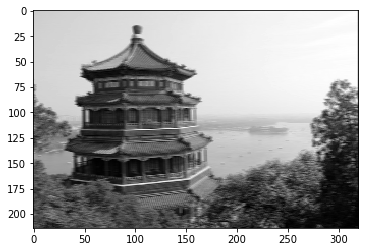

In [8]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
from sklearn.datasets import load_sample_images
from sklearn.datasets import load_sample_image

# Load sample images.... right now the dtype of these images is uint8(427x640)
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape


# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

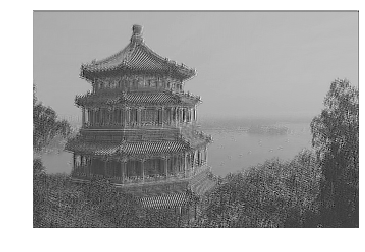

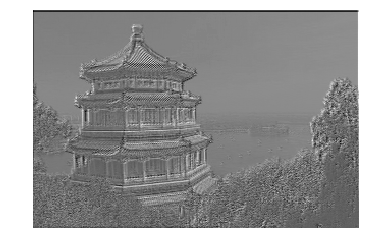

IndexError: index 1 is out of bounds for axis 0 with size 1

In [28]:


def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")


    
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()



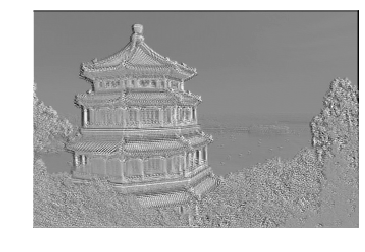

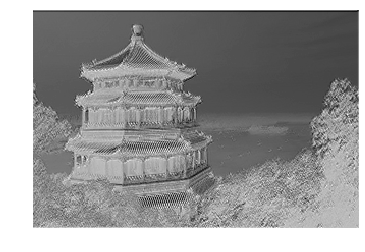

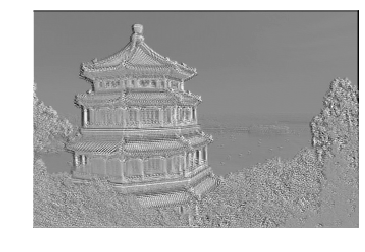

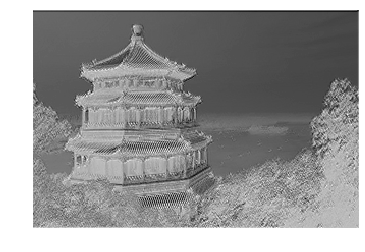

In [31]:
#using tf.layers.conv2d():

tf.reset_default_graph()

china = load_sample_image("china.jpg")
china_ds = np.array(china, dtype=np.float32).reshape(1,427,640,3)
batch_size, height, width, channels = china_ds.shape

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)   #(None, height, width, channels)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

init = tf.global_variables_initializer()


with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: china_ds})
    

    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

In [23]:
china_ds.shape

(427, 640, 3)

In [4]:
#valid vs same padding
import numpy as np
import tensorflow as tf

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print("VALID:\n", valid_conv.eval())
    print("SAME:\n", same_conv.eval())

VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


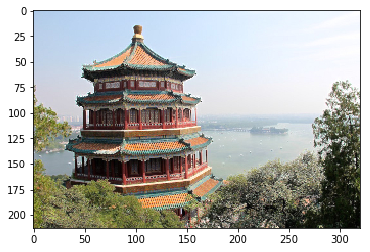

In [9]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()

# #original image is twice the size
# plt.imshow(china.astype(np.uint8))  # plot the output for the 1st image
# plt.show()

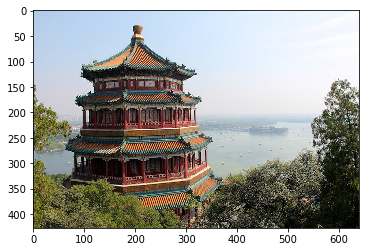